# Introduction

| Column | Description |
| ----------- | ----------- |
| price | Price of the House |
| bedrooms | No. of bedrooms in the House |
| bathrooms | No. of bathrooms in the House |
| sqft_living | Sq. Feet of the Living area in the House |
| sqft_lot | Sq. Feet of the Living area in the House |
| floors | No. of bathrooms in the House |
| waterfront | If the House has water front or not |
| view | Whether the house got a good view or not |
| condition | The condition of the House |
| sqft_above | Square Feet area of the above House |
| sqft_basement | Square Feet area of the beasement in the House |
| yr_built |  The year in which the House was built |
| yr_renovated |  The year in which the House was renovated |

# Importing the Libraries

In [1]:
#Data Analysis Libraries
import numpy as np
import pandas as pd
from scipy import stats

#Data Viz Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Data Processing
from sklearn import preprocessing

#Data Splitting
from sklearn.model_selection import train_test_split

#ML Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import (confusion_matrix,accuracy_score,precision_score,recall_score,f1_score)
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
sns.set_style('darkgrid')
sns.set_palette('tab10')

# Import Data

In [3]:
train_path = pd.read_csv("data.csv")

In [4]:
train_path.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
train_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
train_path.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


We drop the columns of 'date', 'street', 'city', 'statezip' and 'country' as:  
* 'date' will not help in the predicition of the price of the property  
* 'street','city','statezip' these will be dropped for now as once we are able to build the model then we can add these features  
* 'country' will be an useless feature as we have data from USA only which makes the value = 1, making it useless


In [7]:
train_path.drop(['date'],axis=1,inplace=True)
train_path.drop(['street'],axis=1,inplace=True)
train_path.drop(['city'],axis=1,inplace=True)
train_path.drop(['statezip'],axis=1,inplace=True)
train_path.drop(['country'],axis=1,inplace=True)

# Missing Values

Checking for missing values and removing/filling the missing values.

In [8]:
train_path.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
dtype: int64

In [9]:
#train_path['city'].value_counts()

In [10]:
#plt.figure(figsize=(15,10))
#ax = sns.barplot(x="city", y="price", data=train_path)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right");

As we can see above we are not getting null values in the dataset, but it doesn't mean that the dataset is cleaned. To verify that we check if there are any values == 0 in the dataset. Depending on that we can whether if there's any cleaning to be done

In [11]:
(train_path.price == 0).sum()

49

In [12]:
train_path[train_path==0].count()

price              49
bedrooms            2
bathrooms           2
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
dtype: int64

We find that the price, bedrooms, bathrooms have values == 0, which means that those values will skew the model

## Removing Missing Price with Mean

In [13]:
train_path[train_path["price"]==0].agg([min, max, 'mean', 'median'])

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
min,0.0,1.000000,1.00000,720.000000,3500.000000,1.0,0.000000,0.000000,2.000000,720.000000,0.000000,1920.000000,0.000000
max,0.0,6.000000,6.25000,8020.000000,188200.000000,3.0,1.000000,4.000000,5.000000,8020.000000,1950.000000,2013.000000,2009.000000
mean,0.0,3.979592,2.69898,2787.142857,16453.306122,1.5,0.061224,0.795918,3.673469,2295.714286,491.428571,1969.918367,812.714286
median,0.0,4.000000,2.50000,2600.000000,9000.000000,1.5,0.000000,0.000000,3.000000,1990.000000,0.000000,1962.000000,0.000000


From the above table, we can see that in the mean of ('price' == 0), we see that the (average 'bedrooms' = 3) so we keep the range of 2 - 4, in order to balance the min and max. While in the case of 'sqft_living' the average lies between 2500-3000. For the 'floors' we take it as less than 3 and in the case of 'yr_built' is ~1970.  

From the above observed data, we try to find the mean price which would help us fill in the missing values.

In [14]:
mean_price = train_path[(train_path.bedrooms == 4) & (train_path.bathrooms > 2) & (train_path.bathrooms < 4) & (train_path.sqft_living > 2500) & 
         (train_path.sqft_living < 3000) & (train_path.floors < 3) & (train_path.yr_built < 1970)]

In [15]:
mean_price.price.mean()

766316.2946428572

We get the 'mean_price' as 766316.295, instead we take the value of 766000 which is nearly the same

In [16]:
train_path['price'].replace(to_replace = 0, value = 766000, inplace = True)

## Removing Missing Bedrooms with Mean

<Axes: xlabel='bedrooms', ylabel='sqft_living'>

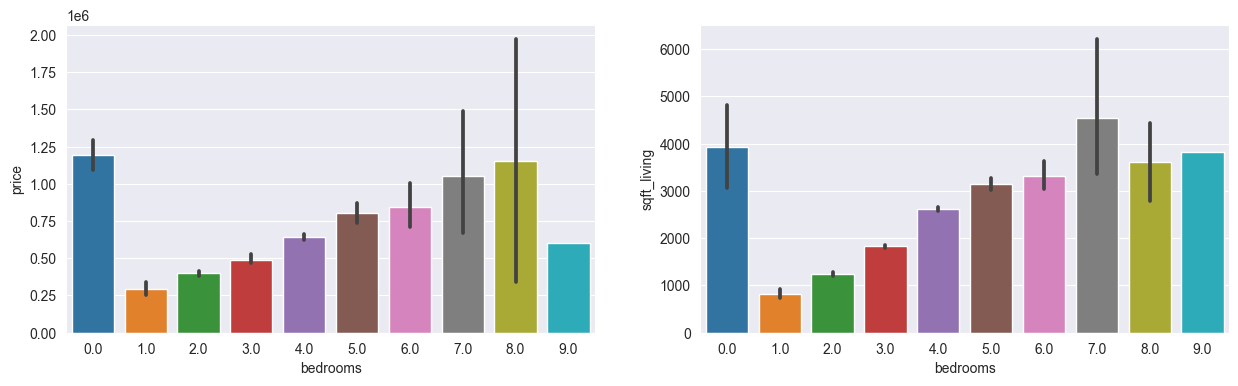

In [17]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(x='bedrooms',y='price',data=train_path)

plt.subplot(1,2,2)
sns.barplot(x='bedrooms',y='sqft_living',data=train_path)

Same as the price variable, we see that the ('bedrooms'==0) is quite similar to the 8 bedrooms on the price vs bedrooms and sqft_living vs bedrooms, so we replace the ('bedrooms'==0) with 8.

In [18]:
train_path['bedrooms'].replace(to_replace = 0, value = 8, inplace = True)

### Removing Missing Bathrooms with Mean

<Axes: xlabel='bathrooms', ylabel='sqft_living'>

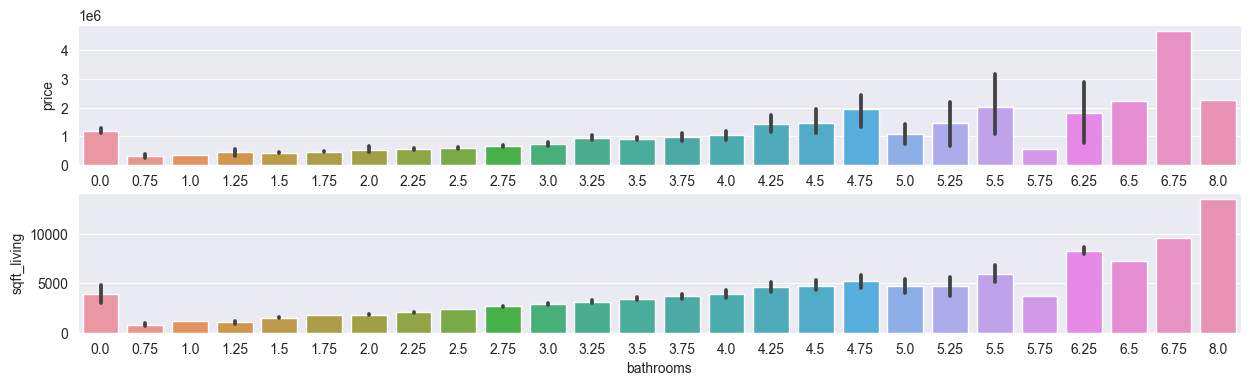

In [19]:
plt.figure(figsize=(15,4))

plt.subplot(2,1,1)
sns.barplot(x='bathrooms',y='price',data=train_path)

plt.subplot(2,1,2)
sns.barplot(x='bathrooms',y='sqft_living',data=train_path)

Same as the above changes, we see that the ('bathrooms'==0) is quite similar to the 4 bathrooms on the price vs bathrooms and sqft_living vs bathrooms, so we replace the ('bathrooms'==0) with 4.

In [20]:
train_path['bathrooms'].replace(to_replace = 0, value = 4, inplace = True)

In [21]:
train_path[train_path==0].count()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       4567
view             4140
condition           0
sqft_above          0
sqft_basement    2745
yr_built            0
yr_renovated     2735
dtype: int64

# Exploratory Data Analysis

In [22]:
train_path.nunique(axis=0)

price            1741
bedrooms            9
bathrooms          25
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
dtype: int64

We take a look at the count of each variable

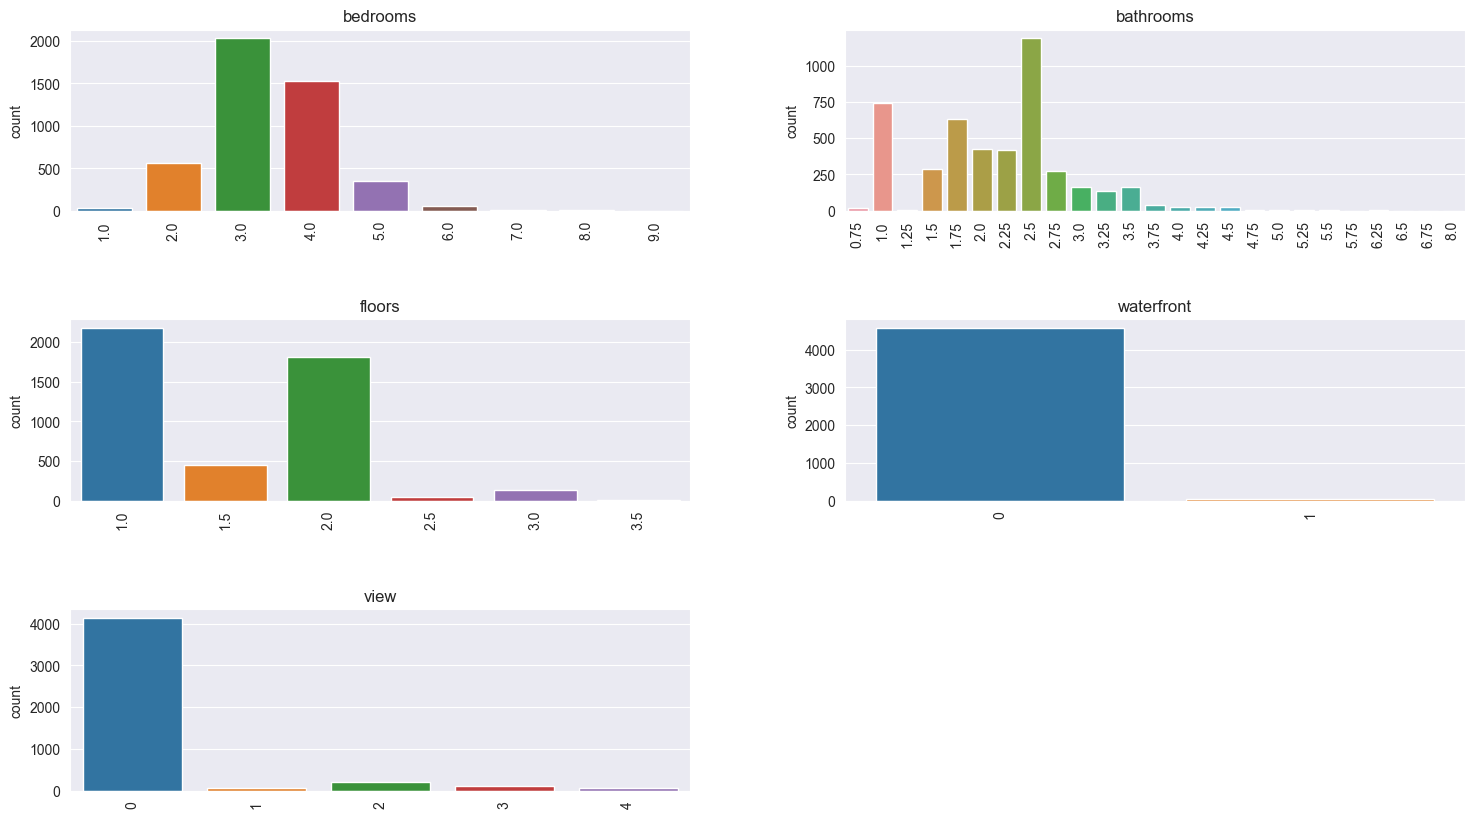

In [23]:
plt.figure(figsize=(18,40))

count = ['bedrooms','bathrooms','floors','waterfront','view']
index = 1

for col in count:
    y = train_path[col].value_counts()
    plt.subplot(11,2,index)
    plt.xticks(rotation=90)
    plt.subplots_adjust(hspace = 0.6,wspace=0.25)
    sns.barplot(x=list(y.index), y=y).set_title(col)
    index +=1

## Relation of each variable with Price and Area

### 1. Bedroom

<Axes: xlabel='bedrooms', ylabel='sqft_living'>

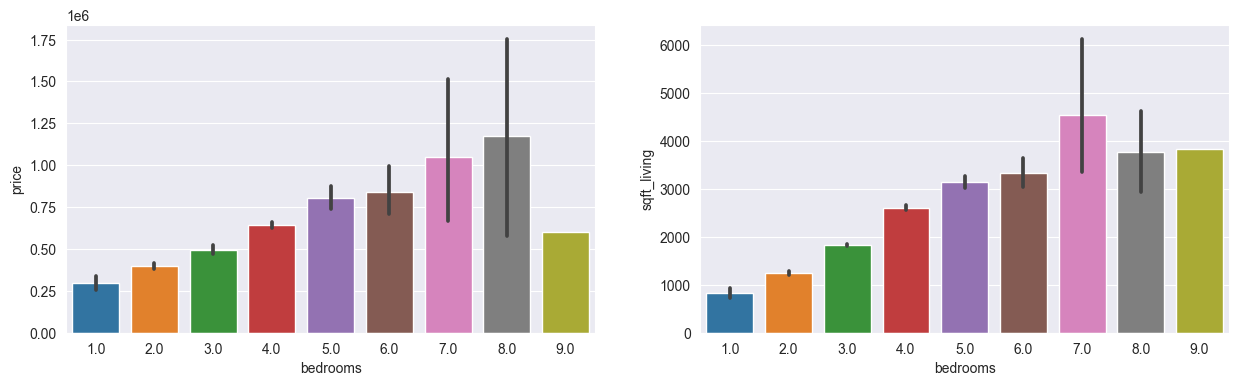

In [24]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(x='bedrooms',y='price',data=train_path)

plt.subplot(1,2,2)
sns.barplot(x='bedrooms',y='sqft_living',data=train_path)

### 2. Bathroom

<Axes: xlabel='bathrooms', ylabel='sqft_living'>

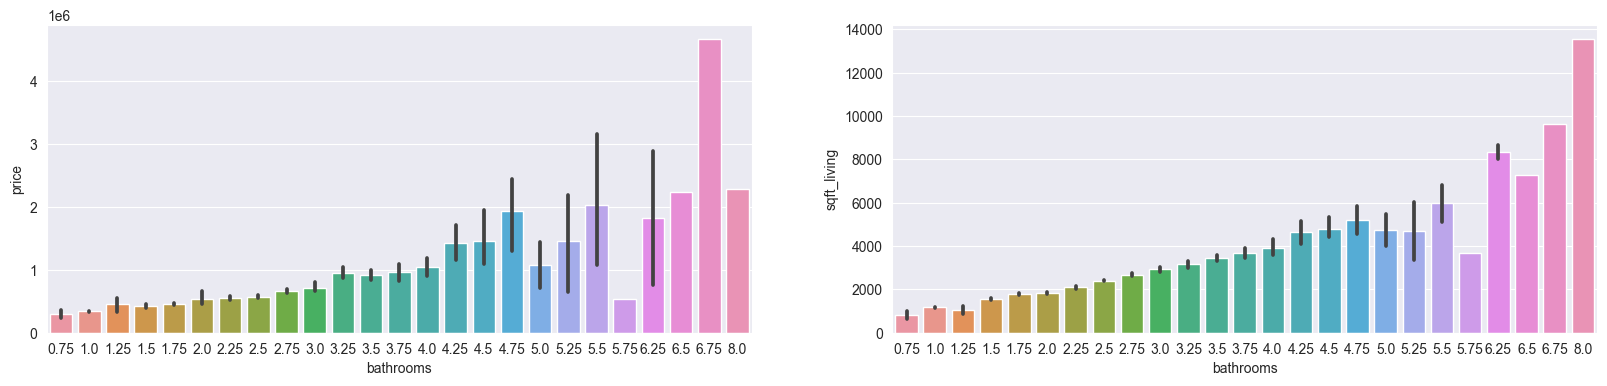

In [25]:
plt.figure(figsize=(20,4))

plt.subplot(1,2,1)
sns.barplot(x='bathrooms',y='price',data=train_path)

plt.subplot(1,2,2)
sns.barplot(x='bathrooms',y='sqft_living',data=train_path)

### 3. floors

<Axes: xlabel='floors', ylabel='sqft_living'>

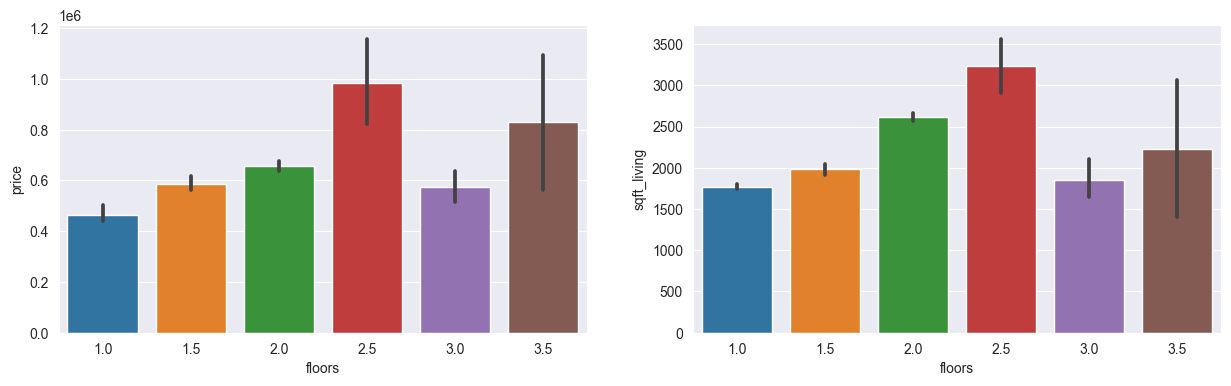

In [26]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
sns.barplot(x='floors',y='price',data=train_path)

plt.subplot(1,2,2)
sns.barplot(x='floors',y='sqft_living',data=train_path)

## Checking for Outliers

c:\Users\Keith\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


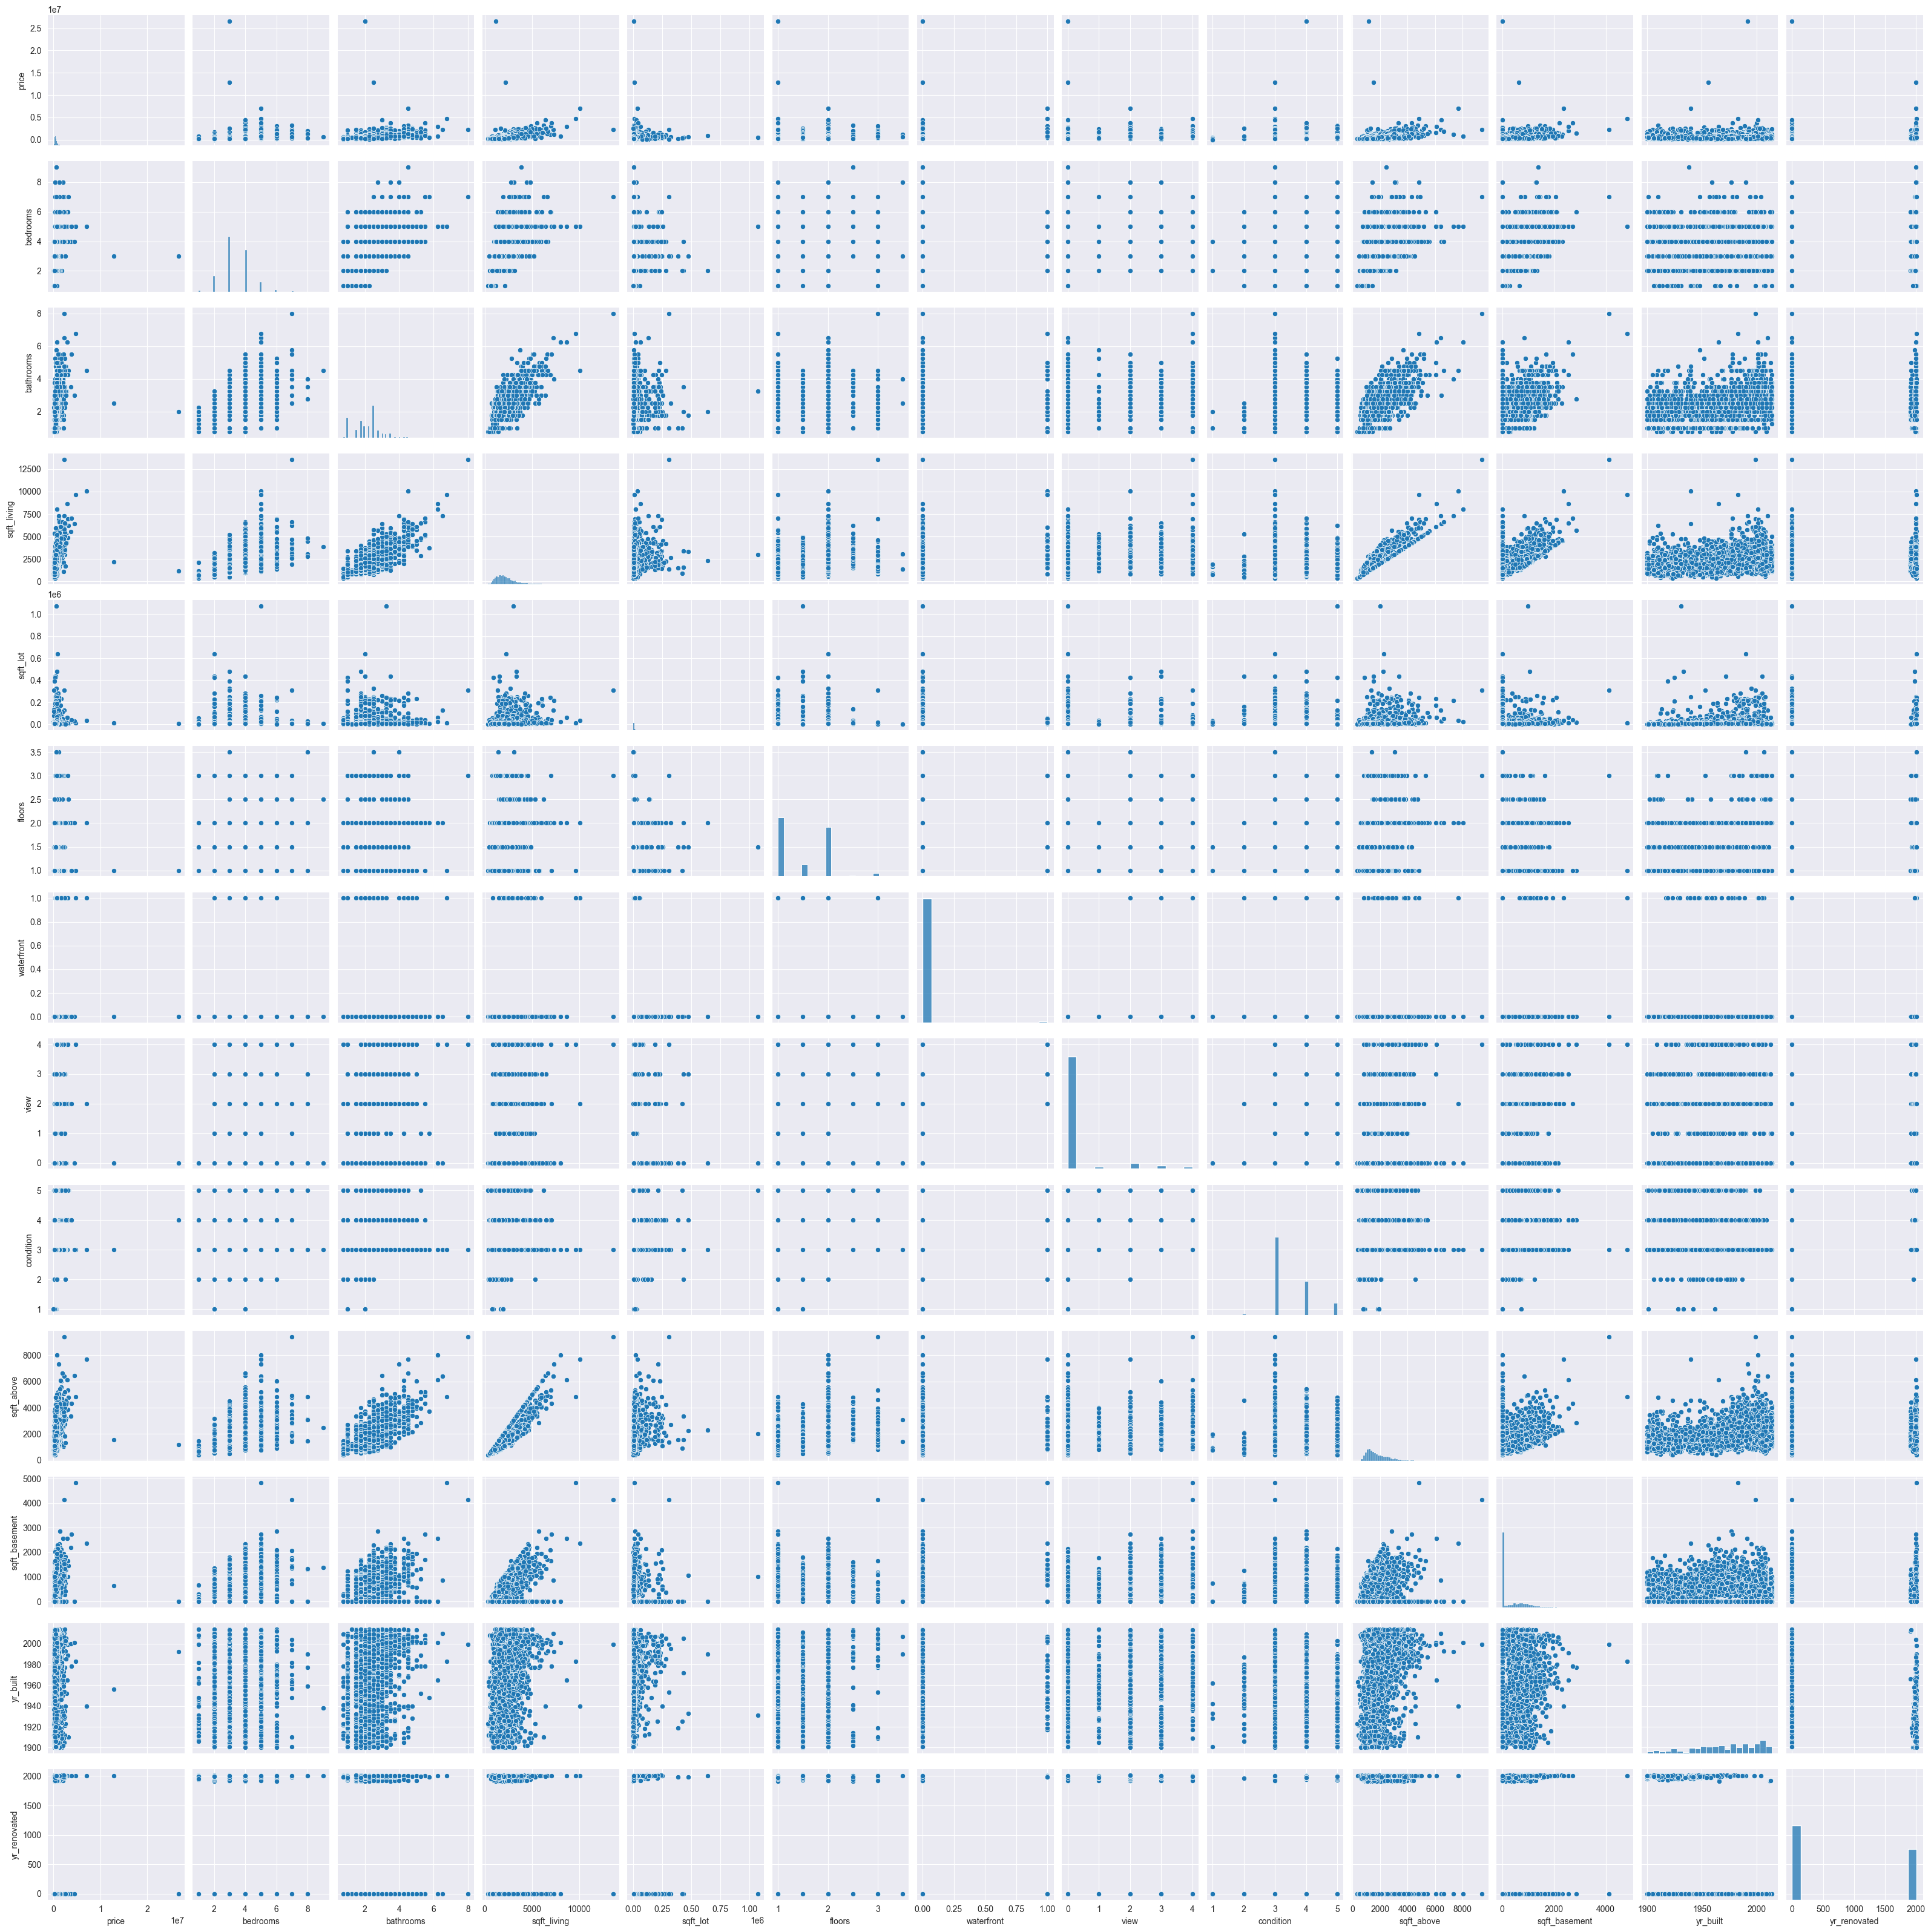

In [27]:
ax = sns.pairplot(train_path)

## Removing outliers from Price

C:\Users\Keith\AppData\Local\Temp\ipykernel_19192\1789577718.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_path['price'],kde=True)


<Axes: xlabel='price', ylabel='Density'>

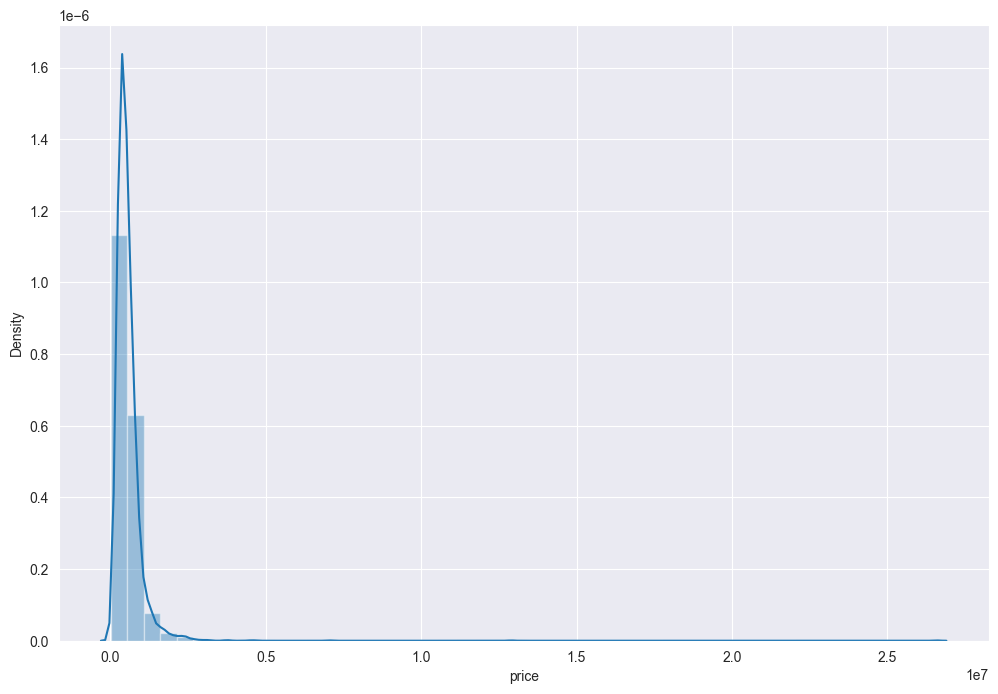

In [28]:
plt.figure(figsize=(12,8))
sns.distplot(train_path['price'],kde=True)

In [29]:
zscore = stats.zscore(train_path['price'])
zscore

0      -0.440297
1       3.249593
2      -0.388628
3      -0.249656
4      -0.018035
          ...   
4595   -0.448908
4596   -0.045949
4597   -0.255171
4598   -0.635571
4599   -0.604926
Name: price, Length: 4600, dtype: float64

In [30]:
train_path['price'] = train_path['price'].replace([train_path['price'][np.abs(zscore)>3]], np.median(train_path['price']))

C:\Users\Keith\AppData\Local\Temp\ipykernel_19192\1789577718.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_path['price'],kde=True)


<Axes: xlabel='price', ylabel='Density'>

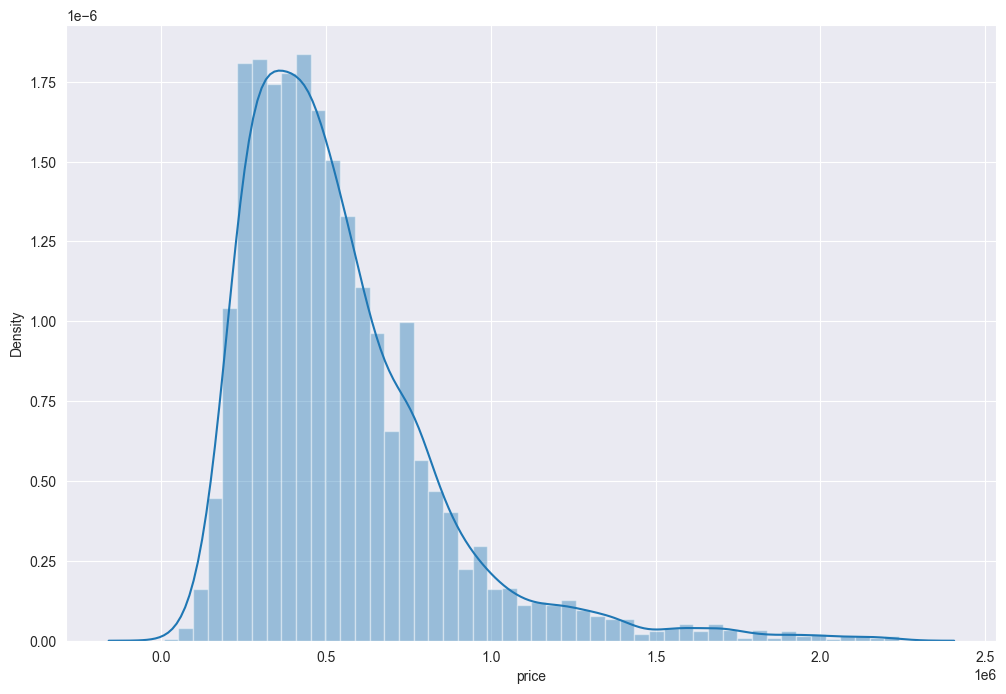

In [31]:
plt.figure(figsize=(12,8))
sns.distplot(train_path['price'],kde=True)

### Sqft_living vs Price

<Axes: xlabel='sqft_living', ylabel='price'>

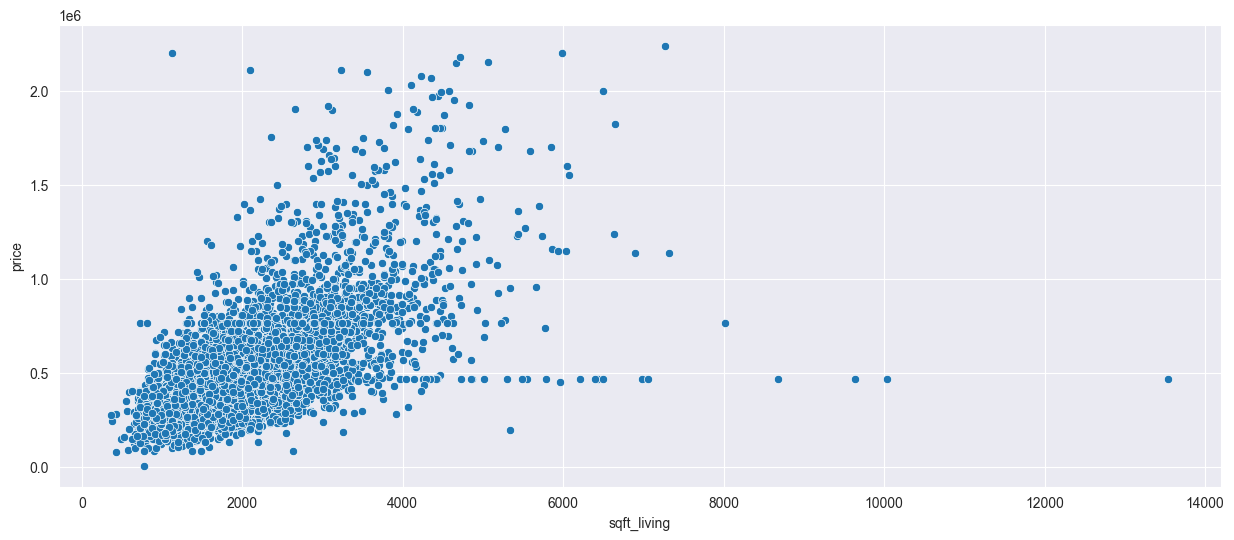

In [32]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=train_path, x="sqft_living", y="price")

In [33]:
train_path['sqft_living'] = np.where((train_path.sqft_living >6000 ), 6000, train_path.sqft_living)

<Axes: xlabel='sqft_living', ylabel='price'>

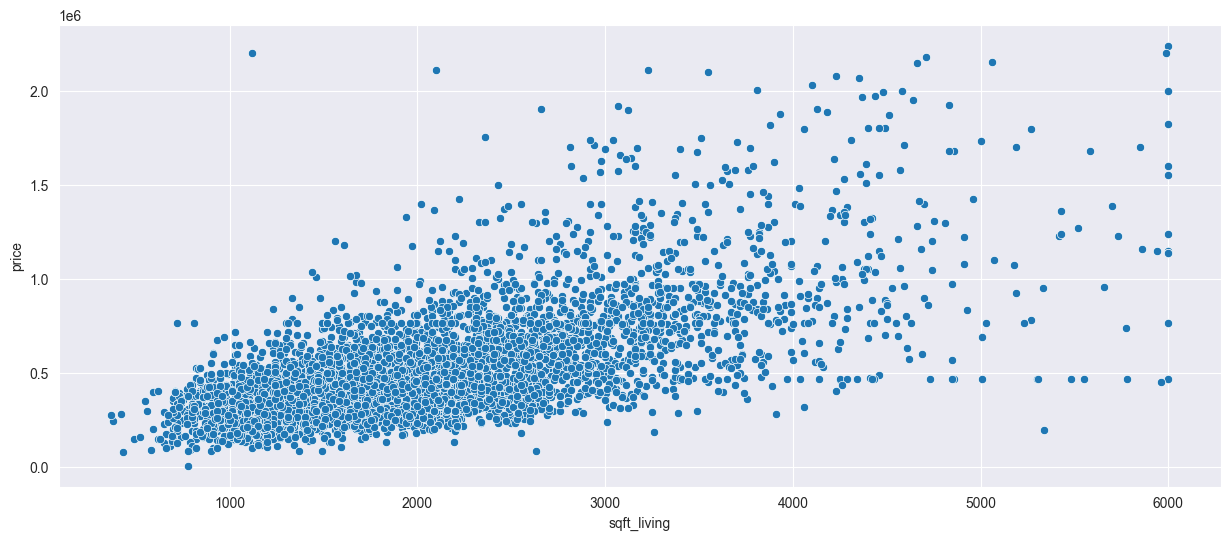

In [34]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=train_path, x="sqft_living", y="price")

### Sqft_lot vs Price

<Axes: xlabel='sqft_lot', ylabel='price'>

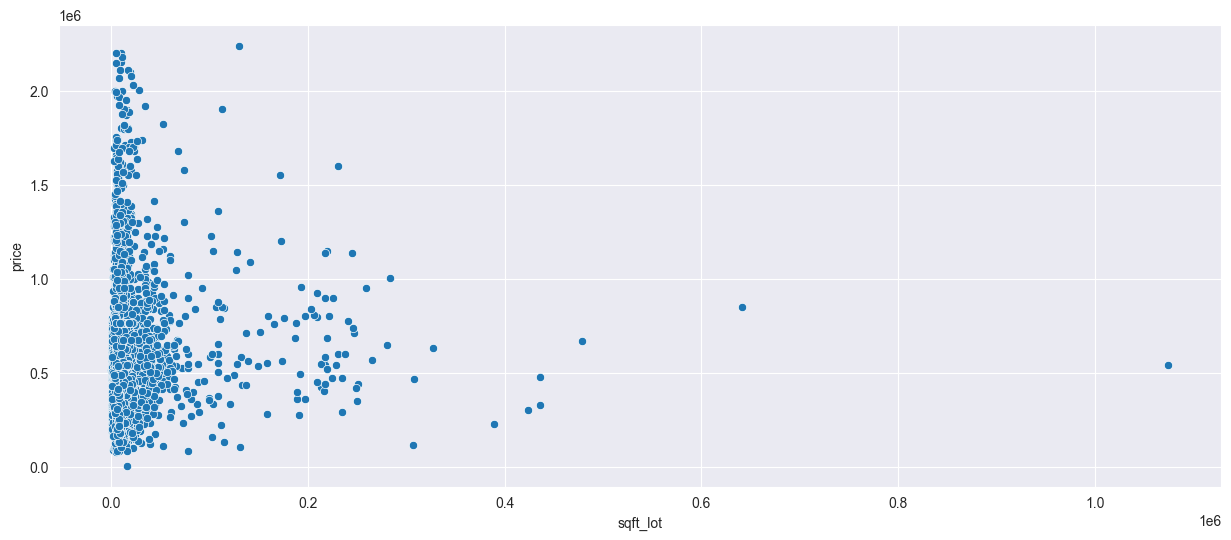

In [35]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=train_path, x="sqft_lot", y="price")

### Sqft_above vs Price

<Axes: xlabel='sqft_above', ylabel='price'>

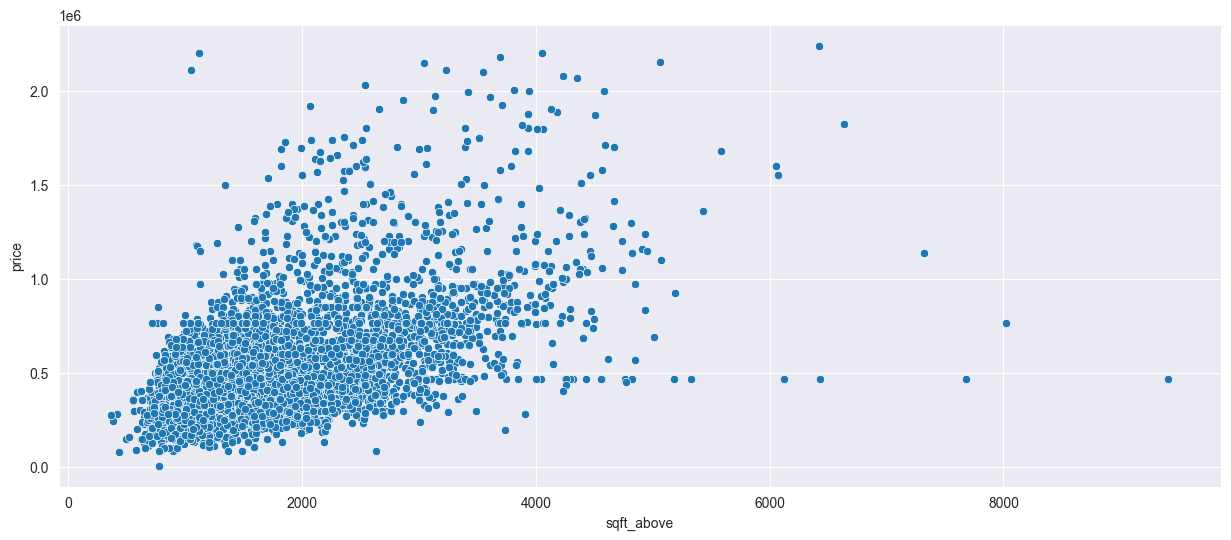

In [36]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=train_path, x="sqft_above", y="price")

In [37]:
train_path['sqft_above'] = np.where((train_path.sqft_above >5000 ), 5000, train_path.sqft_above)

<Axes: xlabel='sqft_above', ylabel='price'>

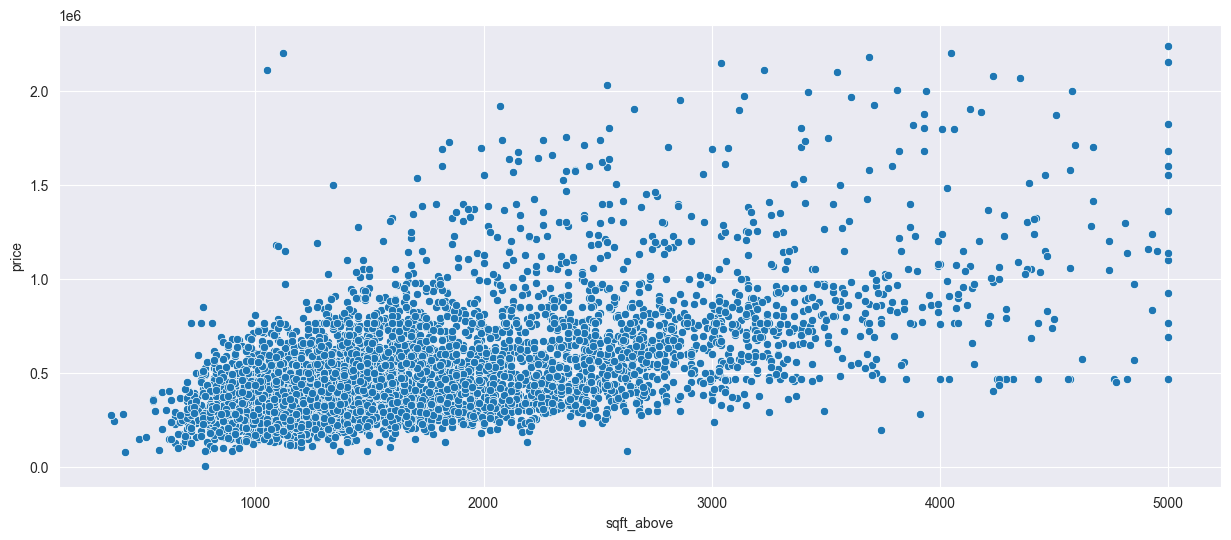

In [38]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=train_path, x="sqft_above", y="price")

### sqft_basement vs Price

<Axes: xlabel='sqft_basement', ylabel='price'>

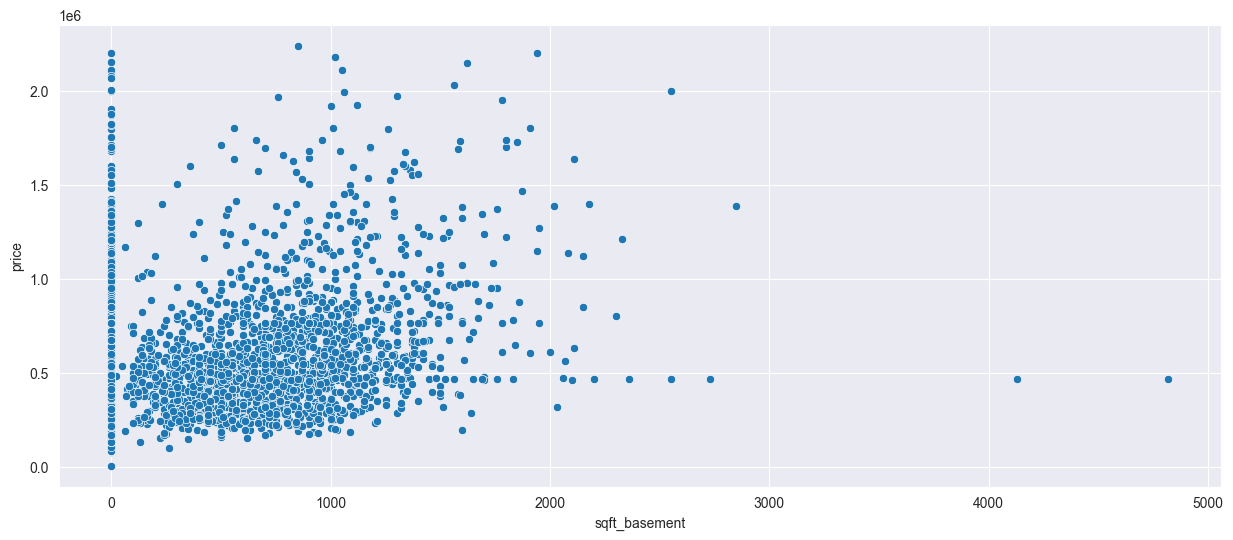

In [39]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=train_path, x="sqft_basement", y="price")

One thing to note is that the 0 values in the 'sqft_basement' are true outliers which represent genuine extreme values.

In [40]:
train_path['sqft_basement'] = np.where((train_path.sqft_basement >2000 ), 2000, train_path.sqft_basement)

<Axes: xlabel='sqft_basement', ylabel='price'>

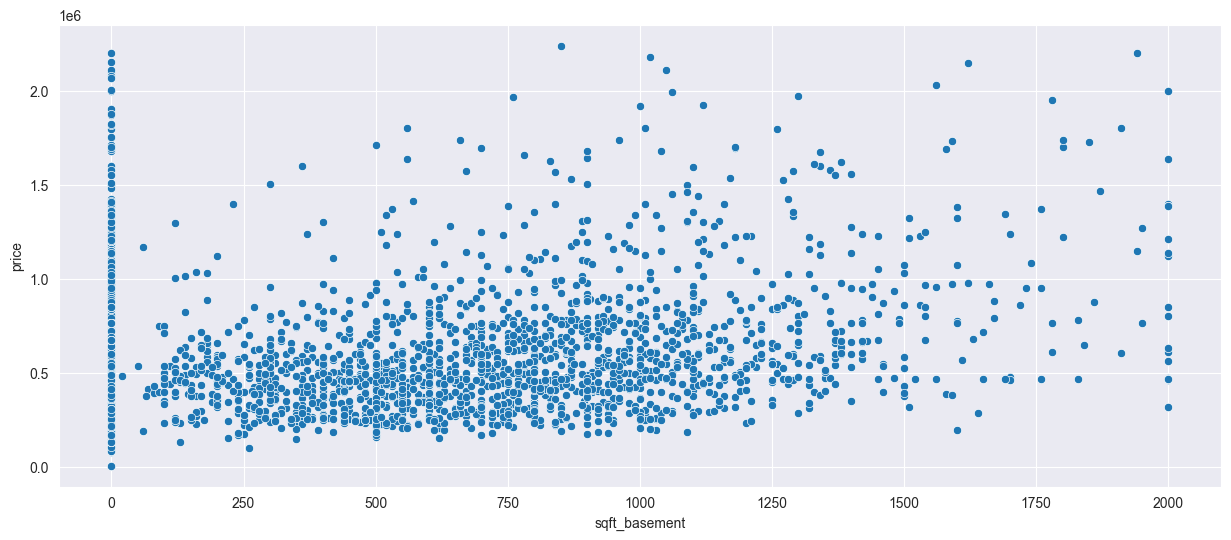

In [41]:
plt.figure(figsize=(15,6))
sns.scatterplot(data=train_path, x="sqft_basement", y="price")

## Correlation

<Axes: >

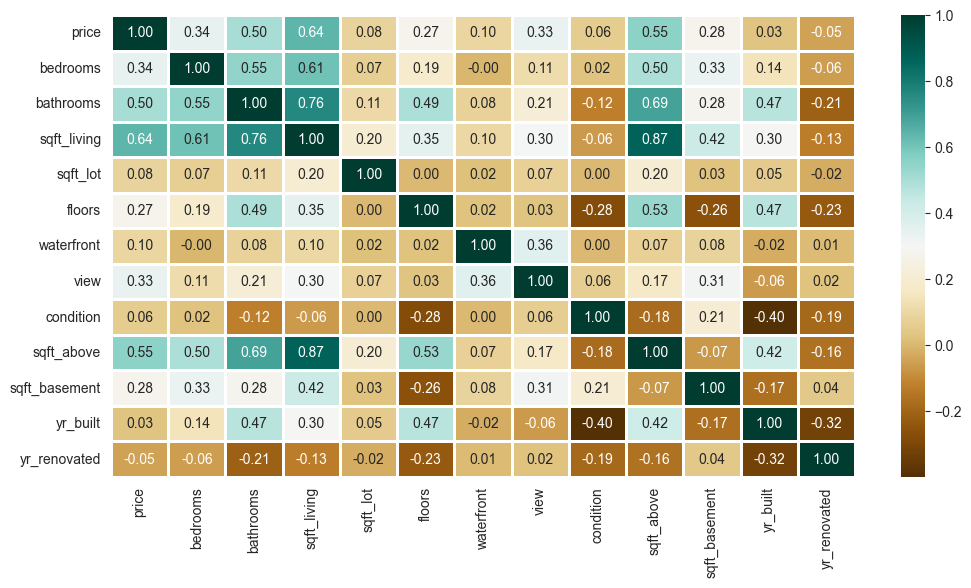

In [42]:
plt.figure(figsize=(12,6))
  
sns.heatmap(train_path.corr(),cmap='BrBG',fmt='.2f',linewidths=2,annot=True)

In [43]:
train_path.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 467.3 KB


# Model Training

In [44]:
from sklearn.model_selection import train_test_split
  
x = train_path.drop(['price'],axis=1)
y = train_path['price']
x.shape,y.shape
  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4,random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2760, 12), (1840, 12), (2760,), (1840,))

In [45]:
def reg(model, x,y, train_path):
    model.fit(x_train,y_train)
    
    pred = model.predict(x_test)
    
    print(r2_score(y_test , pred))
    
    value = 5
    for i in range(value): 
        rnd = np.random.randint(0, y_test.shape[0] - 1)
        actual_value = y_test.iloc[rnd]
        pred_value = int(model.predict(x_test.iloc[rnd].to_frame().T)[0])
        error = ((actual_value - pred_value)/actual_value)*100
        print('Property:',rnd)
        print('Actual Value:',actual_value)
        print('Predicted Value:',pred_value)
        print('Error:', error,'\n')
    
    fig = plt.figure(figsize=(10, 6))
    data = train_path.sort_values(by=['price'])
    
    plt.scatter(range(x.shape[0]), y, color='red', label='Actual')
    plt.scatter(range(x.shape[0]), model.predict(x), marker='.', label='Predict')
    
    plt.legend(loc=2, prop={'size': 25})

0.4767962576535486
Property: 1143
Actual Value: 432000.0
Predicted Value: 345536
Error: 20.014814814814816 

Property: 333
Actual Value: 625000.0
Predicted Value: 533217
Error: 14.68528 

Property: 576
Actual Value: 700000.0
Predicted Value: 656887
Error: 6.159 

Property: 1100
Actual Value: 615000.0
Predicted Value: 479309
Error: 22.063577235772357 

Property: 419
Actual Value: 175000.0
Predicted Value: 431181
Error: -146.38914285714287 



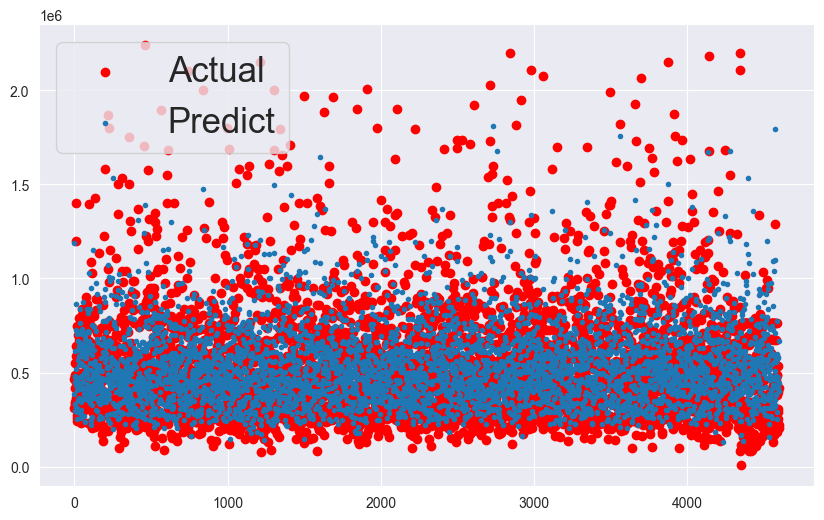

In [46]:
model = LinearRegression()
reg(model, x,y, train_path)

In [47]:
model = Lasso()
reg(model, x,y, train_path)

NameError: name 'Lasso' is not defined

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(x_train,y_train)

pred = lr.predict(x_test)

print(r2_score(y_test , pred))

0.4767962576535486


In [ ]:
from sklearn.linear_model import Lasso , Ridge
    
lr1 = Lasso()

lr1.fit(x_train,y_train)

print(r2_score(y_test , lr1.predict(x_test)))

0.4767575939166556


c:\Users\Keith\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.147e+13, tolerance: 2.453e+10
  model = cd_fast.enet_coordinate_descent(


In [ ]:
from sklearn.linear_model import Lasso , Ridge
    
lr2 = Ridge()

lr2.fit(x_train,y_train)

print(r2_score(y_test , lr2.predict(x_test)))

0.4770610872798039
